## Prediction of carbon dioxide emission of cars 

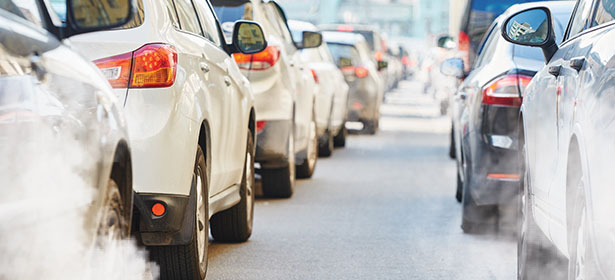

### We are analysing the dataset of co2 emission from cars , here we are processing and modeling the data based on the corelation,we used cross validation for find the best model and accuracy of the predictied value with the target.


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,\
ExtraTreesRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR

### Loading the Dataset

In [2]:
data=pd.read_csv("CO2 emission of cars.csv")
data.sample(10)

,Car,Model,Volume,Weight,CO2,Unnamed: 5
3,Fiat,500,900,865,90,NaN
31,Volvo,XC70,2000,1746,117,NaN
21,Opel,Insignia,2000,1428,99,NaN
18,Skoda,Rapid,1600,1119,104,NaN
0,Toyota,Aygo,1000,790,99,NaN
4,Mini,Cooper,1500,1140,105,NaN
32,Ford,B-Max,1600,1235,104,NaN
30,Mercedes,E-Class,2100,1605,115,NaN
29,BMW,5,2000,1705,114,NaN
11,Suzuki,Swift,1300,990,101,NaN


In [3]:
data.shape

(36, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         36 non-null     object 
 1   Model       36 non-null     object 
 2   Volume      36 non-null     int64  
 3   Weight      36 non-null     int64  
 4   CO2         36 non-null     int64  
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Volume,36.0,1611.111111,388.975047,900.0,1475.00,1600.0,2000.00,2500.0
Weight,36.0,1292.277778,242.123889,790.0,1117.25,1329.0,1418.25,1746.0
CO2,36.0,102.027778,7.454571,90.0,97.75,99.0,105.00,120.0
Unnamed: 5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let check the percentile of duplicated values.

In [6]:
data.duplicated().mean()*100

0.0

#### now we check the null values 

In [7]:
data.isnull().sum()

Car            0
Model          0
Volume         0
Weight         0
CO2            0
Unnamed: 5    36
dtype: int64

In [8]:
data.isnull().mean()*100

Car             0.0
Model           0.0
Volume          0.0
Weight          0.0
CO2             0.0
Unnamed: 5    100.0
dtype: float64

 #### from the above information the 'unnamed' column have contain 100 % of NAN values. so we are drop the column unnamed.

In [9]:
data.drop(columns="Unnamed: 5",inplace=True)
data.sample(5)

,Car,Model,Volume,Weight,CO2
26,Audi,A4,2000,1490,104
35,Mercedes,SLK,2500,1395,120
11,Suzuki,Swift,1300,990,101
21,Opel,Insignia,2000,1428,99
27,Audi,A6,2000,1725,114


##### Univariate analysis explores each variable in this  data set, separately, here we use for loop to get the graph of each column

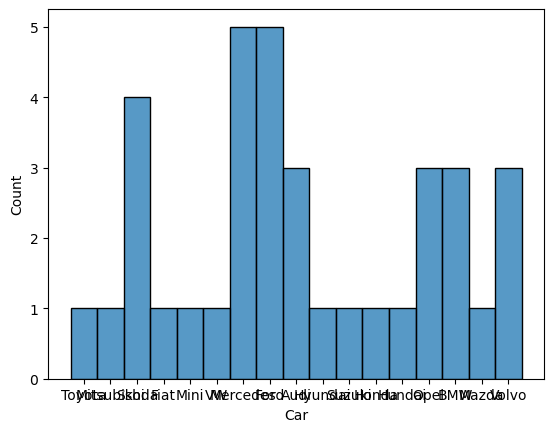

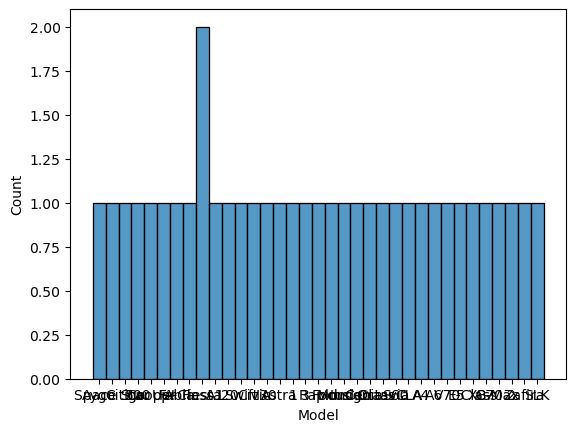

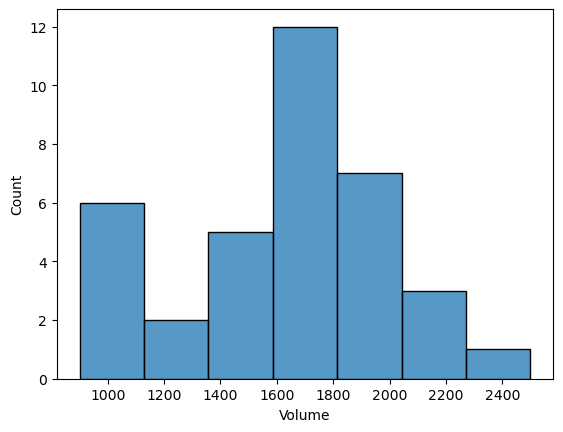

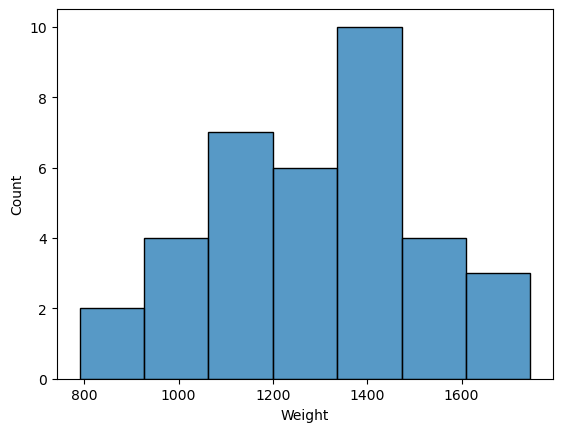

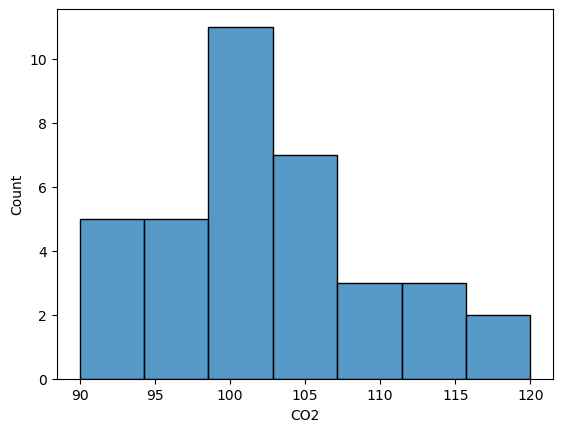

In [10]:
for i in data.columns:
    if data[i].dtypes != "Object":
        sns.histplot(x=data[i])
        plt.show()

#### Kde plot

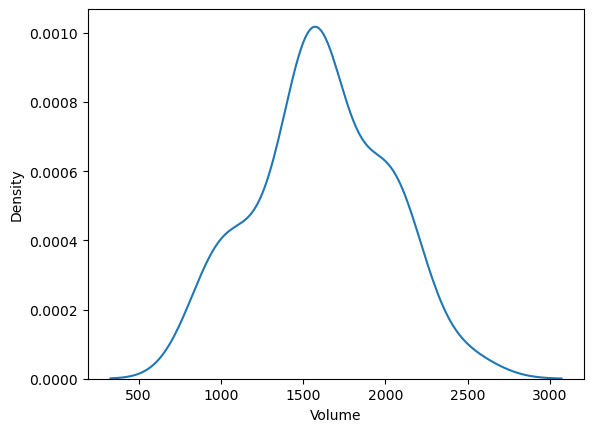

In [11]:
sns.kdeplot("Volume",data=data)
plt.show()

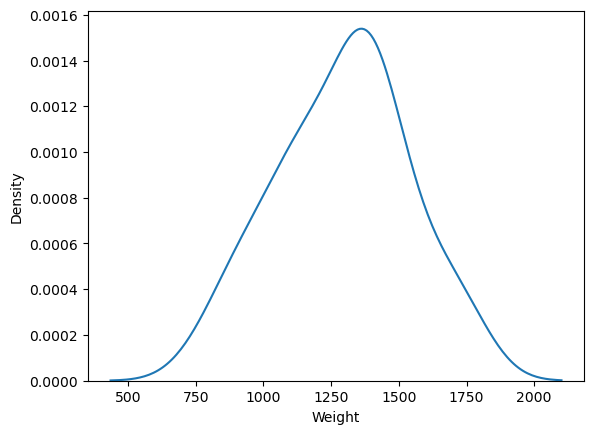

In [12]:
sns.kdeplot("Weight",data=data)
plt.show()

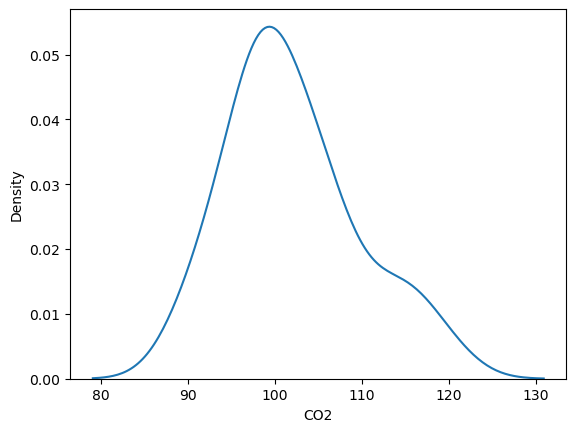

In [13]:
sns.kdeplot("CO2",data=data)
plt.show()

### Label Encoding the Categorical Variables

In [14]:
le=LabelEncoder()

In [15]:
data["Car"]=le.fit_transform(data["Car"])
data["Model"]=le.fit_transform(data["Model"])

### BoxPlot

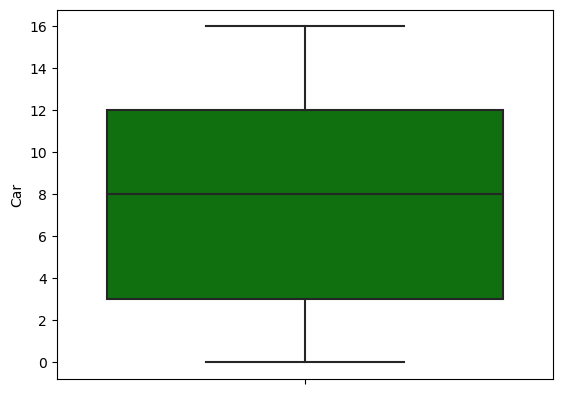

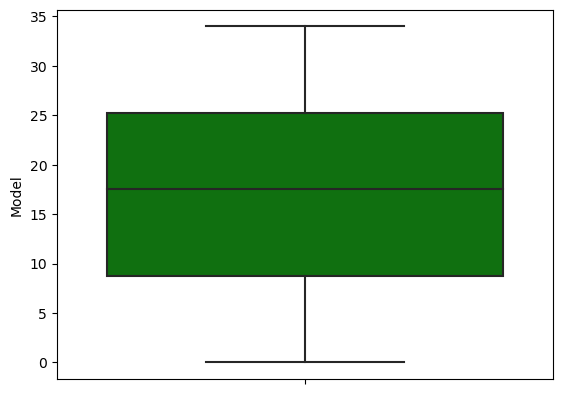

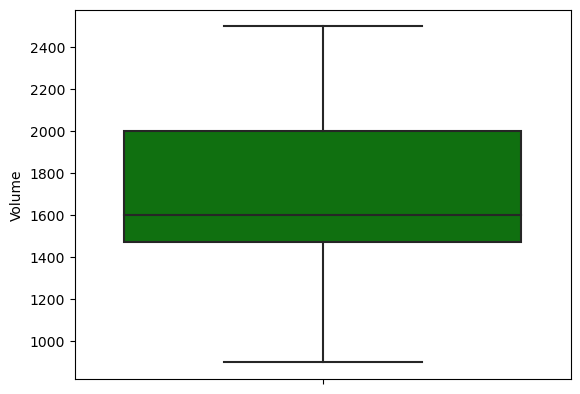

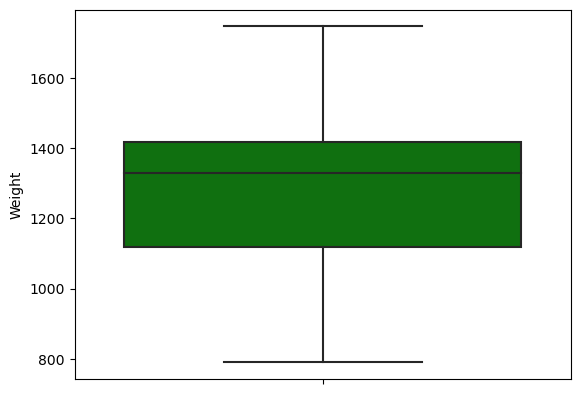

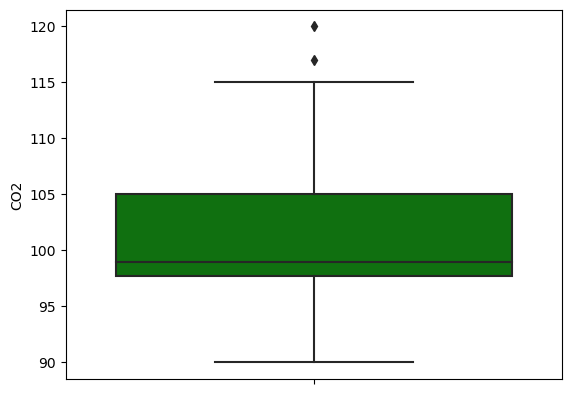

In [16]:
for i in data.columns:
    if data[i].dtype != "Object":
        sns.boxplot(y=data[i],color="green")
        plt.show()

#### Outlier Treating

In [17]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [18]:
for i in data.columns:
    if data[i].dtype !="Object":
        UL,LL=outlier_limit(data[i])
        data[i]=np.where((data[i]>UL)|(data[i]<LL),np.nan,data[i])

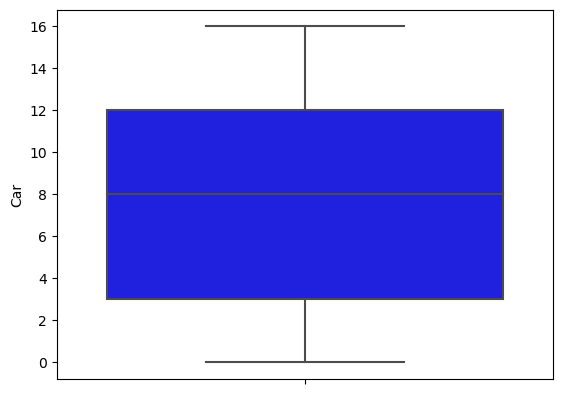

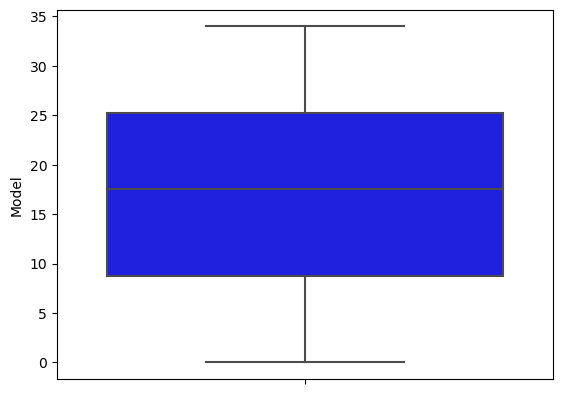

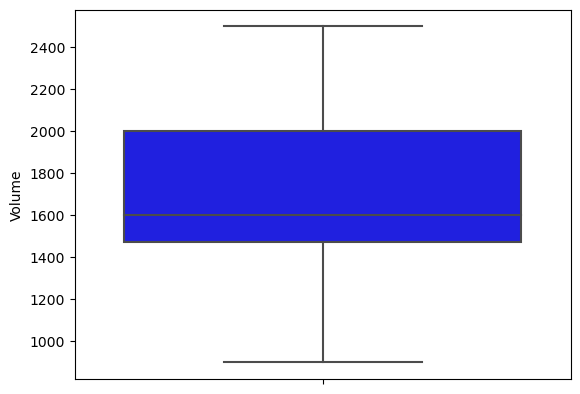

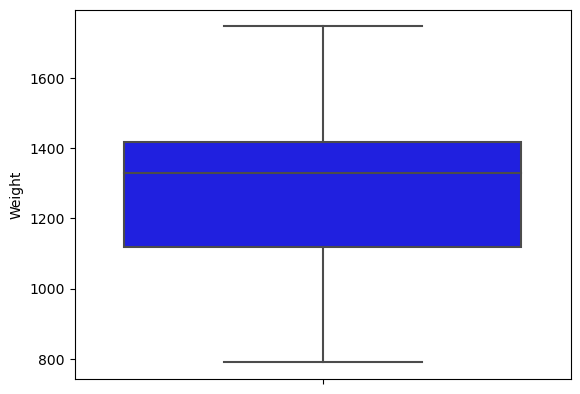

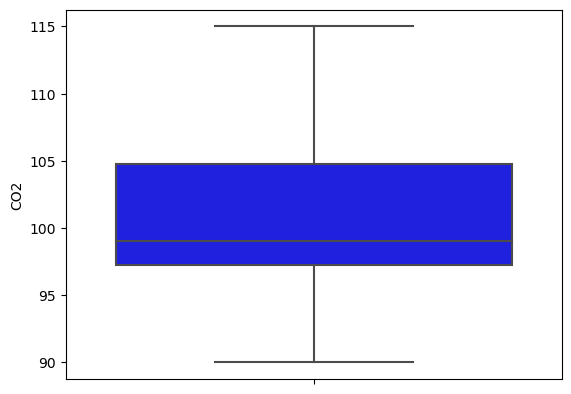

In [19]:
for i in data.columns:
    if data[i].dtype !="Object":
        sns.boxplot(y=data[i],color="blue")
        plt.show()

In [20]:
data.isnull().mean()*100

Car       0.000000
Model     0.000000
Volume    0.000000
Weight    0.000000
CO2       5.555556
dtype: float64

In [21]:
data.dropna(inplace=True)

### Checking  correlation with the target values

<AxesSubplot:>

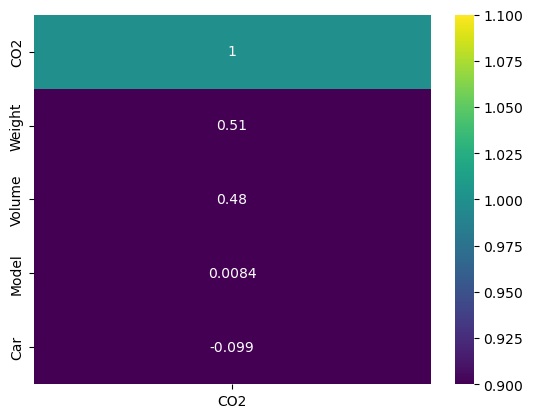

In [22]:
sns.heatmap(data.corr()[['CO2']].sort_values(by="CO2",ascending=False),vmin=1,vmax=1,annot=True,cmap='viridis')

### Lets take only the columns with good correlation with the target

In [23]:
x=data[["Volume","Weight"]].values

In [24]:
y=data[["CO2"]].values

### Feature Scaling

In [25]:
sc=StandardScaler()

In [26]:
x=sc.fit_transform(x)

### Selecting the model using Cross Validation

In [27]:
models=({
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
   " DecisionTreeRegressor":DecisionTreeRegressor(),
   " GradientBoostingRegressor":GradientBoostingRegressor(),
   " AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
})

In [28]:
for name,model in models.items():
    scores = cross_val_score(model,x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model :{}".format(name))
    rmse=np.sqrt(-scores)
    rmse_average=np.mean(rmse)
    print("Average RMSe: ",rmse_average)
    print("*"*100)

cross validation model :LinearRegression
Average RMSe:  5.824785435234774
****************************************************************************************************
cross validation model :Ridge
Average RMSe:  5.791513751381044
****************************************************************************************************
cross validation model :LinearSVR
Average RMSe:  76.13780488330262
****************************************************************************************************
cross validation model : DecisionTreeRegressor
Average RMSe:  8.049634473603252
****************************************************************************************************
cross validation model : GradientBoostingRegressor
Average RMSe:  8.082649850658582
****************************************************************************************************
cross validation model : AdaBoostRegressor
Average RMSe:  5.730041161750434
***************************************************

 #### From the cross validation score we find that AdaBoosterRegressor have the least Average RMSE value, So lets select the AdaBoosterRegressor for the modeling.


### Splitting the data set into training and testing

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [36]:
model=AdaBoostRegressor(n_estimators=100)

In [37]:
model.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=100)

### Model Accuracy

In [38]:
training_score=model.score(x_train,y_train)
training_score

0.8890240069220723

In [46]:
y_pred= model.predict(x)

In [47]:
R2_Score=r2_score(y,y_pred)*100
R2_Score

69.49882228378425

In [48]:
Prediction=pd.DataFrame(zip(y,y_pred),columns=('Actual','Predicted'),dtype=float)
Prediction

,Actual,Predicted
0,99.0,99.400000
1,95.0,97.000000
2,95.0,100.333333
3,90.0,90.000000
4,105.0,101.727273
5,105.0,100.333333
6,90.0,93.307692
7,92.0,96.000000
8,98.0,100.333333
9,99.0,101.000000


### We can see that prediction is closer to the actual value

<function matplotlib.pyplot.show(close=None, block=None)>

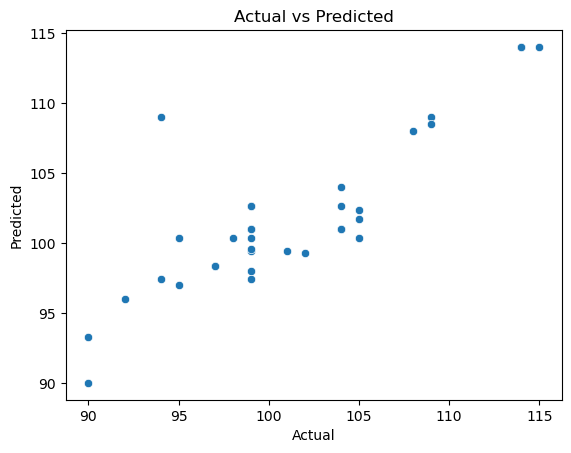

In [63]:
plt.figuresize=(18,6)
plt.title("Actual vs Predicted")
sns.scatterplot(data=Prediction,x="Actual",y="Predicted")
plt.show

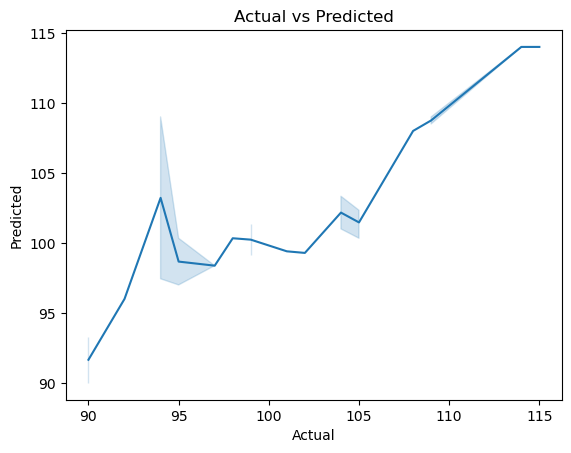

In [50]:
sns.lineplot(x="Actual",y="Predicted",data=Prediction)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

#### Explatory Data Analysis

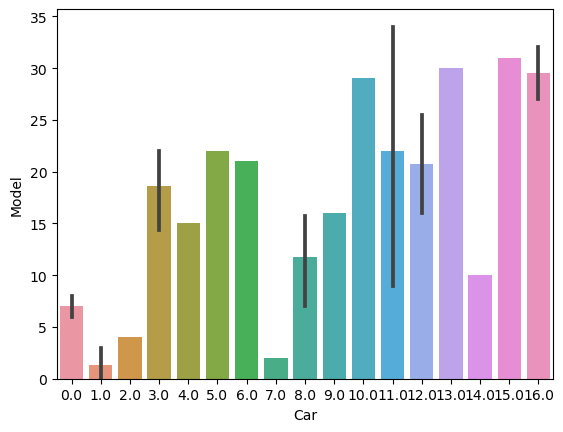

In [51]:
plt.figsize=(15,8)
sns.barplot(data=data,x="Car",y="Model")
plt.show()

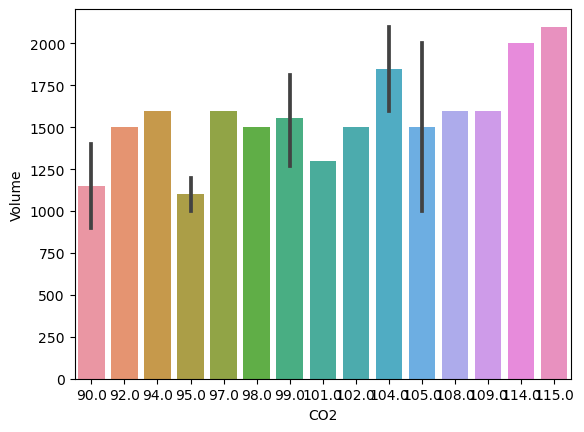

In [52]:
sns.color_palette("mako",as_cmap=True)
sns.barplot(data=data,x="CO2",y="Volume")
plt.show()

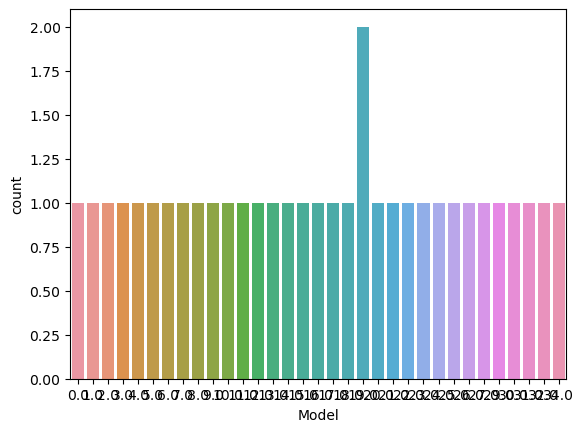

In [53]:
sns.countplot(x=data["Model"])
plt.show()

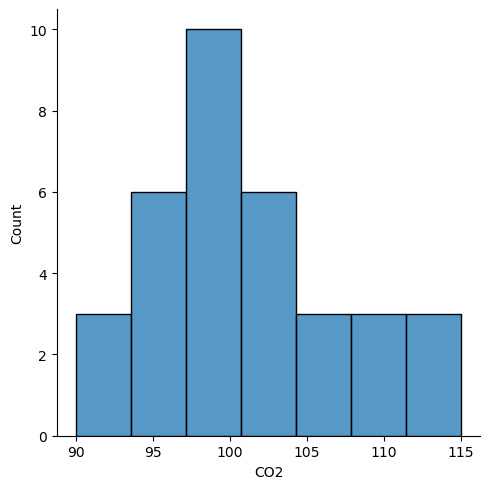

In [56]:
sns.displot(data=data,x="CO2")
plt.show()

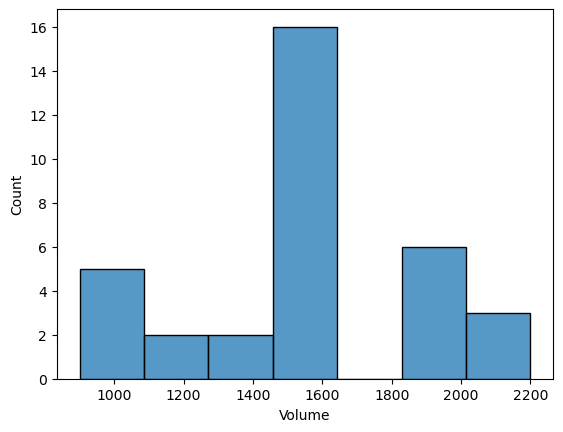

In [57]:
sns.histplot(data=data,x="Volume")
plt.show()

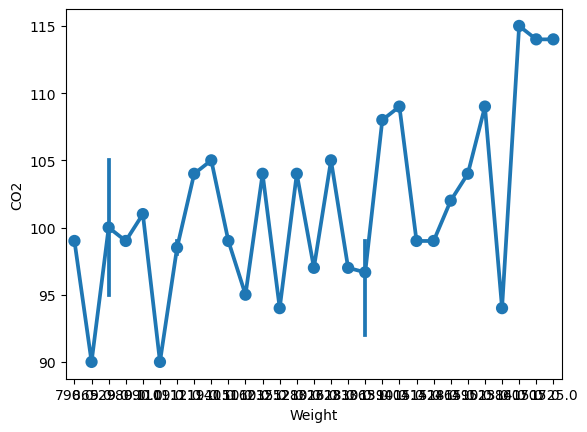

In [59]:
sns.pointplot(data=data,x="Weight",y="CO2")
plt.show()

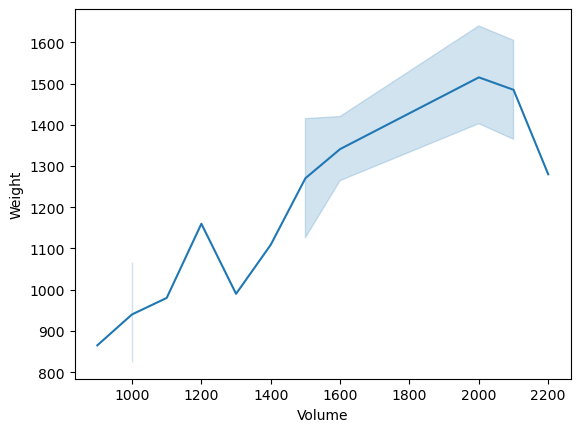

In [60]:
sns.lineplot(data=data,x="Volume",y="Weight")
plt.show()

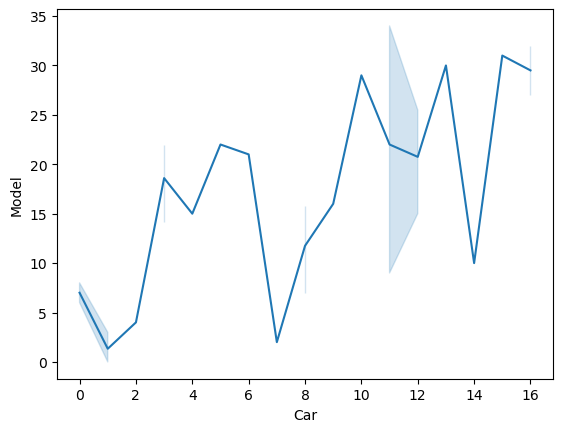

In [65]:
sns.lineplot(data=data,x="Car",y="Model")
plt.show()